# Análise Exploratória de Dados

Análise preliminar dos resultados obtidos pela execução das heurísticas sob as instâncias disponibilizados pela OR-Library.

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Diretório contendo os dados gerados pela execução da simulação
DATA_FOLDER = os.path.join("..", "outputdata", "heuristics")

os.path.exists(DATA_FOLDER)

True

---

In [3]:
filename = os.path.join(DATA_FOLDER,"instance_problem.csv")

dfInstanceProblems = pd.read_csv(filename)

dfInstanceProblems.head()

,Problem,Vertices,Edges,Terminals
0,B1,50,63,9
1,B2,50,63,13
2,B3,50,63,25
3,B4,50,100,9
4,B5,50,100,13


In [4]:
len(dfInstanceProblems['Problem'])

18

## Leitura dos dados das simulações

Os arquivos se encontram no diretório descrito pela variável DATA_FOLDER.

A nomeação dos arquivos segue o seguinte padrão:

    [SIGLA_HEURISTICA]_[NOME_INSTÂNCIA_PROBLEMA].CSV
    
As siglas para heurística são:

    - PMH - Prunning MST Heuristic
    - SPH - Shortest Path Heuristic
    - SPHPrim - Shortest Path Heuristic with Prim
    - SPHO - Shortest Path Heuristic with Origin

Os nomes dos arquivos para cada instância do problema são aqueles descritos na OR-Library. 
A geração desses nomes é facilitada pela função [generate_file_name] no módulo [util.py] desse diretório [notebooks].

In [5]:
from util import generate_file_names

HEURISTICAS = ["PMH", "SPH", "SPHPrim", "SPHO"]

# a função generate_file_names retornar um objeto do tipo 'generator'
STEIN_B = [filename 
           for filename in generate_file_names("b", file_extension="csv")]

In [6]:
# help(pd.read_csv)

In [7]:
dataset = STEIN_B[12]
print(dataset)

data = list()

for heuristica in HEURISTICAS:
    filename = os.path.join(DATA_FOLDER,f'{heuristica}_{dataset}')
    data.append(pd.read_csv(filename))

dfData = pd.concat(data, ignore_index=True)

steinb13.csv


In [8]:
dfData.columns = ["Vértice", "Se Terminal", "Heurística", "Custo"]

In [9]:
dfData.head()

,Vértice,Se Terminal,Heurística,Custo
0,2,False,PMH,195
1,83,True,PMH,189
2,3,True,PMH,189
3,38,False,PMH,205
4,62,False,PMH,195


In [10]:
dfData.tail()

,Vértice,Se Terminal,Heurística,Custo
395,89,False,SPHO,236
396,94,False,SPHO,210
397,31,False,SPHO,208
398,1,False,SPHO,191
399,88,False,SPHO,198


In [11]:
dfData.sample(5)

,Vértice,Se Terminal,Heurística,Custo
1,83,True,PMH,189
365,26,False,SPHO,216
62,17,False,PMH,199
29,53,False,PMH,192
8,5,False,PMH,189


In [13]:
dfData['Custo'].describe()

count    400.000000
mean     192.990000
std       13.572599
min      168.000000
25%      184.000000
50%      189.000000
75%      200.000000
max      249.000000
Name: Custo, dtype: float64

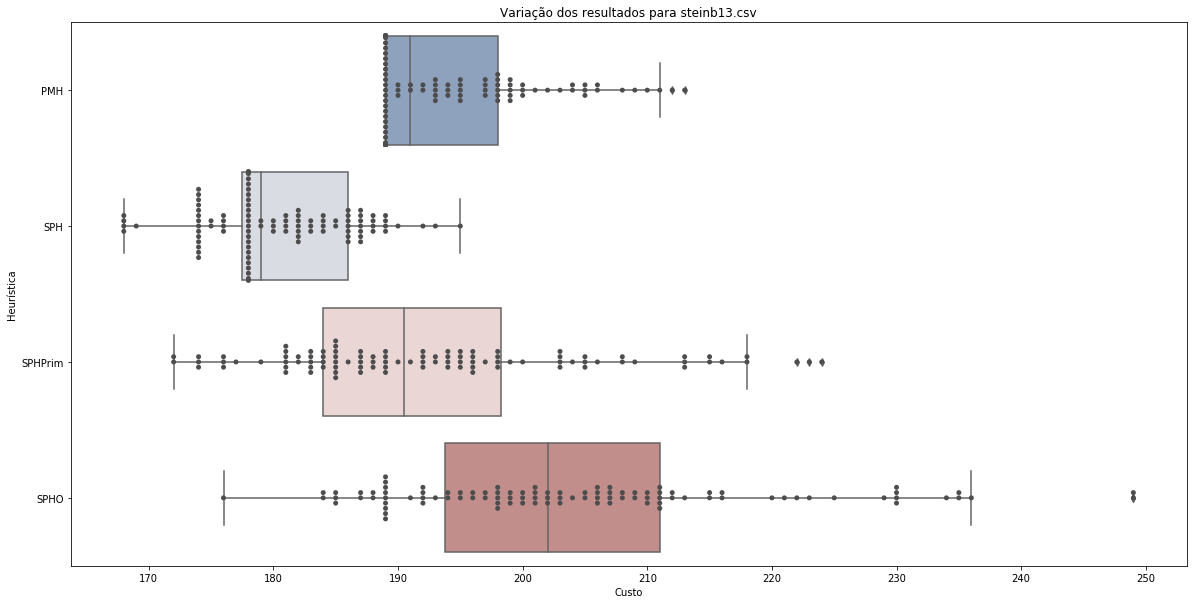

In [14]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos resultados para {dataset}')
plt.xlabel("Custo")
plt.ylabel("Heurística")

sns.boxplot(x="Custo", 
            y="Heurística",
            data=dfData,
            palette="vlag",
           )

sns.swarmplot(x="Custo",
              y="Heurística",
              data=dfData,
              size=5,
              color=".3",
              linewidth=0
             )

In [ ]:
# sns.distplot(dfData["Cost"], kde=True, rug=True, color="g")